In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# EDA

In [3]:
df = pd.read_csv("train.csv") 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


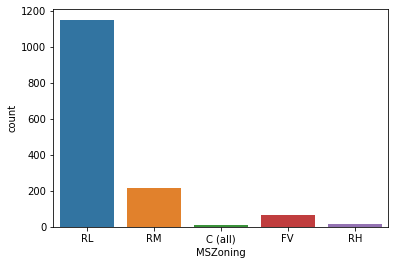

In [4]:
Dist_MSZoning = sns.countplot(x="MSZoning", data=df)

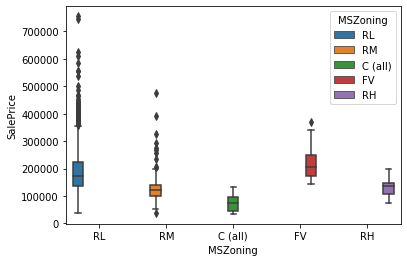

In [5]:
MSZoning = sns.boxplot(x="MSZoning", y="SalePrice", hue="MSZoning", data=df)
# keep, cut the categories from 8 to 5

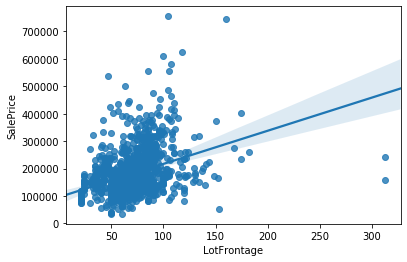

In [6]:
LotFrontage = sns.regplot(x=df["LotFrontage"], y=df["SalePrice"])
# may not keep, because the linear regression is not significant

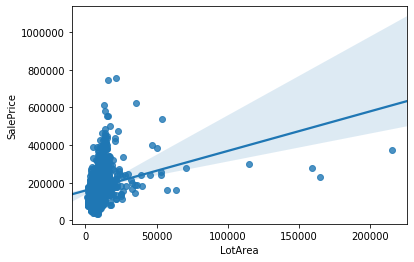

In [7]:
LotArea = sns.regplot(x=df["LotArea"], y=df["SalePrice"])
# considering not keeping, because the linear regression is not significant

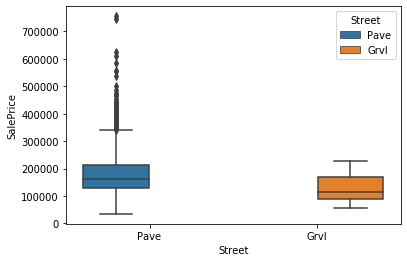

In [8]:
Street = sns.boxplot(x="Street", y="SalePrice", hue="Street", data=df)
# keep the feature

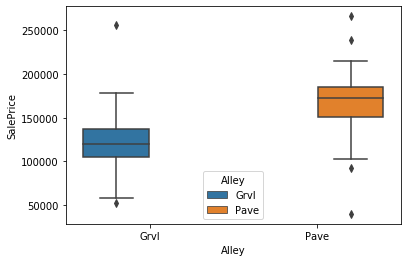

In [9]:
Alley = sns.boxplot(x="Alley", y="SalePrice", hue="Alley", data=df)

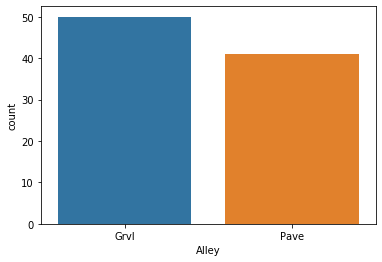

In [10]:
Dist_Alley = sns.countplot(x="Alley", data=df)
# may not keep, because too many NaN most values are NaN, or combined with Street.

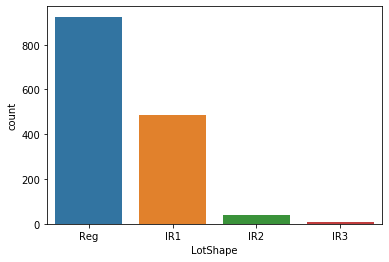

In [11]:
Dist_LotShape = sns.countplot(x="LotShape", data=df)

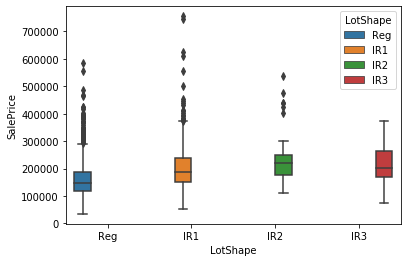

In [12]:
LotShape = sns.boxplot(x="LotShape", y="SalePrice", hue="LotShape", data=df)
# Convert Categorical to boolean

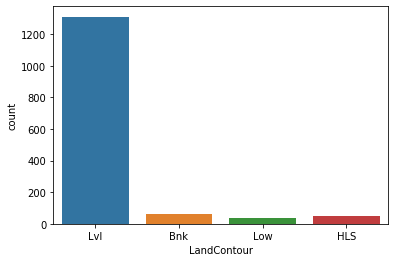

In [13]:
Dist_LandContour = sns.countplot(x="LandContour", data=df)
# Convert Categorical variables to boolean

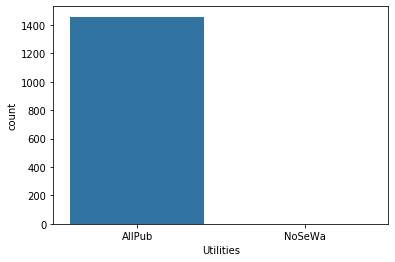

In [14]:
Dist_Utilities = sns.countplot(x="Utilities", data=df)
# drop the feature

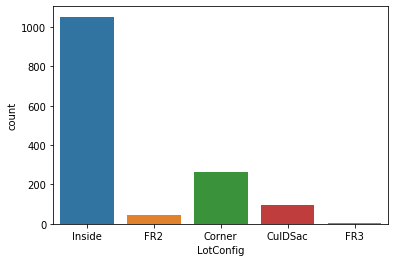

In [15]:
Dist_LotConfig = sns.countplot(x="LotConfig", data=df)
# Convert categorical to boolean

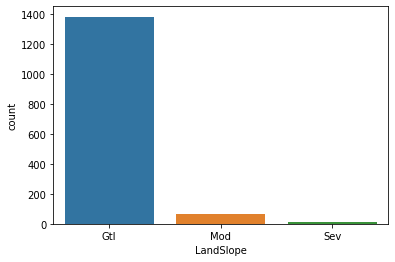

In [16]:
Dist_LandSlope = sns.countplot(x="LandSlope", data=df)
# Drop the feature?

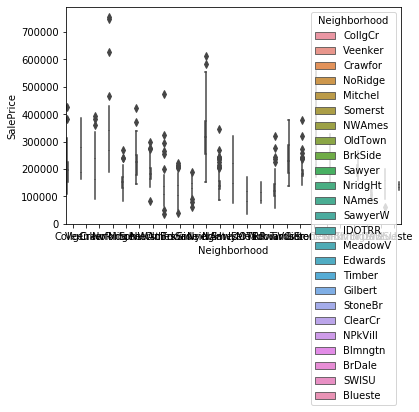

In [17]:
Neighborhood = sns.boxplot(x="Neighborhood", y="SalePrice", hue="Neighborhood", data=df)
# change the scope?

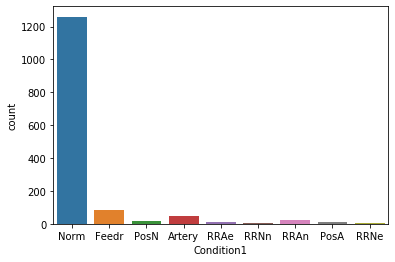

In [18]:
Dist_Condition = sns.countplot(x="Condition1", data=df)
# convert categorical to boolean, or convert those categories into "positive", "normal", "negative"
# combine condition1 and condition2

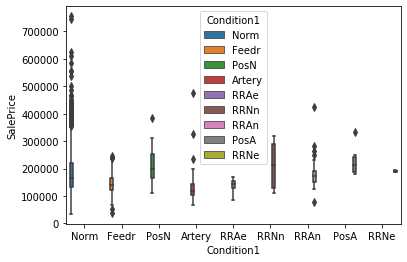

In [19]:
Condition = sns.boxplot(x="Condition1", y="SalePrice", hue="Condition1", data=df)

In [ ]:
Dist_Condition = sns.countplot(x="BldgType", data=df)
# convert to boolean or drop the feature, because no big difference among the medians. 

In [ ]:
BldgType = sns.boxplot(x="BldgType", y="SalePrice", hue="BldgType", data=df)

In [ ]:
Dist_HouseStyle = sns.countplot(x="HouseStyle", data=df)
# convert to "2 story", "1 story", "SFoyer" "SLvl"

In [ ]:
HouseStyle = sns.boxplot(x="HouseStyle", y="SalePrice", hue="HouseStyle", data=df)

In [ ]:
OverallQual_vs_OverallCond = sns.regplot(x=df["OverallQual"], y=df["OverallCond"])
# hmmm, interesting

In [ ]:
OverallQual = sns.regplot(x=df["OverallQual"], y=df["SalePrice"])
# keep the feature

In [ ]:
OverallCond = sns.regplot(x=df["OverallCond"], y=df["SalePrice"])
# why does it look like this?

In [ ]:
YearBuilt = sns.regplot(x=df["YearBuilt"], y=df["SalePrice"])


In [ ]:
YearRemodAdd = sns.regplot(x=df["YearRemodAdd"], y=df["SalePrice"])


# Data Cleansing and Preprocessing

In [5]:
df[["LotFrontage","LotArea", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", 
      "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "GarageCars", 
    "GarageArea"]].isna().any()

LotFrontage      True
LotArea         False
MasVnrArea       True
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
GrLivArea       False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
TotRmsAbvGrd    False
GarageCars      False
GarageArea      False
dtype: bool

In [6]:
df['LotFrontage'].fillna(df["LotFrontage"].mean(), inplace = True)
df['MasVnrArea'].fillna(df["MasVnrArea"].mean(), inplace = True)

## Encoding

In [7]:
df[["MSZoning", "SalePrice"]].groupby("MSZoning").mean().sort_values(by = ["SalePrice"], ascending = False)

,SalePrice
MSZoning,
FV,214014.061538
RL,191004.994787
RH,131558.375000
RM,126316.830275
C (all),74528.000000


In [8]:
df[["SaleCondition", "SalePrice"]].groupby("SaleCondition").mean().sort_values(by = ["SalePrice"], ascending = False)

,SalePrice
SaleCondition,
Partial,272291.752000
Normal,175202.219533
Alloca,167377.416667
Family,149600.000000
Abnorml,146526.623762
AdjLand,104125.000000


In [9]:
df.loc[df['SaleCondition'] == "Partial", 'SaleCondition'] = 214014
df.loc[df['SaleCondition'] == "Normal", 'SaleCondition'] = 175202
df.loc[df['SaleCondition'] == "Alloca", 'SaleCondition'] = 167377
df.loc[df['SaleCondition'] == "Family", 'SaleCondition'] = 1496526
df.loc[df['SaleCondition'] == "Abnorml", 'SaleCondition'] = 146525
df.loc[df['SaleCondition'] == "AdjLand", 'SaleCondition'] = 104125

In [10]:
df.loc[df['MSZoning'] == "FV", 'MSZoning'] = 214014
df.loc[df['MSZoning'] == "RL", 'MSZoning'] = 191004
df.loc[df['MSZoning'] == "RH", 'MSZoning'] = 131558
df.loc[df['MSZoning'] == "RM", 'MSZoning'] = 126316
df.loc[df['MSZoning'] == "C (all)", 'MSZoning'] = 74528

In [11]:
df[["MiscFeature", "SalePrice"]].groupby("MiscFeature").mean().sort_values(by = ["SalePrice"], ascending = False)

,SalePrice
MiscFeature,
TenC,250000.000000
Gar2,170750.000000
Shed,151187.612245
Othr,94000.000000


In [12]:
df.loc[df['MiscFeature'] == "TenC", 'MiscFeature'] = 250000
df.loc[df['MiscFeature'] == "Gar2", 'MiscFeature'] = 170750
df.loc[df['MiscFeature'] == "Shed", 'MiscFeature'] = 151187
df.loc[df['MiscFeature'] == "Othr", 'MiscFeature'] = 94000
df['MiscFeature'].fillna(df["SalePrice"].mean(), inplace = True)

In [13]:
df[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().sort_values(by = ["SalePrice"], ascending = False)

,SalePrice
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


In [14]:
df.loc[df['Neighborhood'] == "NoRidge", 'Neighborhood'] = 335295
df.loc[df['Neighborhood'] == "NridgHt", 'Neighborhood'] = 316270
df.loc[df['Neighborhood'] == "StoneBr", 'Neighborhood'] = 310499
df.loc[df['Neighborhood'] == "Timber", 'Neighborhood'] = 242247
df.loc[df['Neighborhood'] == "Veenker", 'Neighborhood'] = 238772
df.loc[df['Neighborhood'] == "Somerst", 'Neighborhood'] = 225379
df.loc[df['Neighborhood'] == "ClearCr", 'Neighborhood'] = 212565
df.loc[df['Neighborhood'] == "Crawfor", 'Neighborhood'] = 210624
df.loc[df['Neighborhood'] == "CollgCr", 'Neighborhood'] = 197965
df.loc[df['Neighborhood'] == "Blmngtn", 'Neighborhood'] = 194870
df.loc[df['Neighborhood'] == "Gilbert", 'Neighborhood'] = 192854
df.loc[df['Neighborhood'] == "NWAmes", 'Neighborhood'] = 189050
df.loc[df['Neighborhood'] == "SawyerW", 'Neighborhood'] = 186555
df.loc[df['Neighborhood'] == "Mitchel", 'Neighborhood'] = 156270
df.loc[df['Neighborhood'] == "NAmes", 'Neighborhood'] = 145847
df.loc[df['Neighborhood'] == "NPkVill", 'Neighborhood'] = 142694
df.loc[df['Neighborhood'] == "SWISU", 'Neighborhood'] = 142591
df.loc[df['Neighborhood'] == "Blueste", 'Neighborhood'] = 137500
df.loc[df['Neighborhood'] == "Sawyer", 'Neighborhood'] = 136793
df.loc[df['Neighborhood'] == "OldTown", 'Neighborhood'] = 128225
df.loc[df['Neighborhood'] == "Edwards", 'Neighborhood'] = 128219
df.loc[df['Neighborhood'] == "BrkSide", 'Neighborhood'] = 124834
df.loc[df['Neighborhood'] == "BrDale", 'Neighborhood'] = 104493
df.loc[df['Neighborhood'] == "IDOTRR", 'Neighborhood'] = 100123
df.loc[df['Neighborhood'] == "MeadowV", 'Neighborhood'] = 98576

## Standardization

In [15]:
std_scalar_model = StandardScaler()
ln_part = std_scalar_model.fit_transform(df[["MSZoning", "Neighborhood", "TotalBsmtSF", "LotArea", "GrLivArea", "TotRmsAbvGrd", "MiscFeature"]].to_numpy())
nln_part = df[["OverallQual", "OverallCond", "YearBuilt"]].to_numpy()
std_feature = np.hstack((ln_part,nln_part))

# Cross Validation

In [16]:
X = std_feature
X

array([[ 3.87161805e-01,  2.90567321e-01, -4.59302541e-01, ...,
         7.00000000e+00,  5.00000000e+00,  2.00300000e+03],
       [ 3.87161805e-01,  9.86238250e-01,  4.66464916e-01, ...,
         6.00000000e+00,  8.00000000e+00,  1.97600000e+03],
       [ 3.87161805e-01,  2.90567321e-01, -3.13368755e-01, ...,
         7.00000000e+00,  5.00000000e+00,  2.00100000e+03],
       ...,
       [ 3.87161805e-01,  5.06375841e-01,  2.15641221e-01, ...,
         7.00000000e+00,  9.00000000e+00,  1.94100000e+03],
       [ 3.87161805e-01, -5.97931650e-01,  4.69052804e-02, ...,
         5.00000000e+00,  6.00000000e+00,  1.95000000e+03],
       [ 3.87161805e-01, -8.98450853e-01,  4.52783624e-01, ...,
         5.00000000e+00,  6.00000000e+00,  1.96500000e+03]])

In [17]:
y = df.loc[: ,"SalePrice"].to_numpy()
y.shape

(1460,)

In [18]:
import matplotlib.pyplot as plt
def plot(x,y):
    plt.scatter(x, y, alpha=0.5)
    plt.show()
    return

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linear = LinearRegression()
    linear.fit(X_train[:,:7], y_train)
    residual = y_train - linear.predict(X_train[:,:7])
    #plot(y_train, linear.predict(X_train[:,:7]))
    rf = RandomForestRegressor(criterion = "mse", n_estimators = 45)
    #rf = MLPRegressor(hidden_layer_sizes = (10,10,10,10), max_iter = 20000, learning_rate = 'adaptive', n_iter_no_change = 500, verbose = True)
    rf.fit(X_train,residual)
    
    
    y_test_pred = rf.predict(X_test) + linear.predict(X_test[:,:7])
    y_train_pred = rf.predict(X_train) + linear.predict(X_train[:,:7])
    #plot(y_train, y_train_pred)
    #plot(y_test, y_test_pred)
    mape = np.mean(np.abs(y_test_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape, mape_train)

0.10285636449330915 0.03970363381986848
0.09466671914711657 0.039591996020809456
0.10477449231754102 0.038680905167276416
0.10555279891966757 0.038118068360504596
0.11615487573023735 0.03916673048387673


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr = RandomForestRegressor(criterion = "mse", n_estimators = 45)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    mape = 1- np.mean(np.abs(y_pred - y_test)/y_test)
    mape_train = 1- np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape, mape_train)

0.8997004051226098 0.9583127842463433
0.89128682660217 0.95910622302764
0.8943378794037349 0.9580615217229271
0.888097753529306 0.96036973060211
0.8869900736083289 0.9592007059749096


# Test Data

In [71]:
test = pd.read_csv("test.csv") 
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [172]:
test[["LotFrontage","LotArea", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", 
      "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "GarageCars", 
    "GarageArea"]].isna().any()

LotFrontage      True
LotArea         False
MasVnrArea       True
TotalBsmtSF     False
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
GrLivArea       False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
TotRmsAbvGrd    False
GarageCars       True
GarageArea       True
dtype: bool

In [173]:
test['LotFrontage'].fillna(df["LotFrontage"].mean(), inplace = True)
test['MasVnrArea'].fillna(df["MasVnrArea"].mean(), inplace = True)
test['GarageCars'].fillna(df["GarageCars"].mean(), inplace = True)
test['GarageArea'].fillna(df["GarageArea"].mean(), inplace = True)

In [73]:
test['TotalBsmtSF'].fillna(test["TotalBsmtSF"].mean(), inplace = True)
# test['MSZoning'].fillna(test["MSZoning"].mode(), inplace = True)      fill nan with mode manually
test['MiscFeature'].fillna(test["SalePrice"].mean(), inplace = True)

In [74]:
test[["OverallQual","OverallCond", "GrLivArea", "LotArea", "TotalBsmtSF", "MSZoning", "Neighborhood", "TotRmsAbvGrd", 
      "MiscFeature", "FullBath"]].isna().any()

OverallQual     False
OverallCond     False
GrLivArea       False
LotArea         False
TotalBsmtSF     False
MSZoning        False
Neighborhood    False
TotRmsAbvGrd    False
MiscFeature     False
FullBath        False
dtype: bool

In [79]:
test.loc[test['MSZoning'] == "FV", 'MSZoning'] = 214014
test.loc[test['MSZoning'] == "RL", 'MSZoning'] = 191004
test.loc[test['MSZoning'] == "RH", 'MSZoning'] = 131558
test.loc[test['MSZoning'] == "RM", 'MSZoning'] = 126316
test.loc[test['MSZoning'] == "C (all)", 'MSZoning'] = 74528

In [130]:
test.loc[test['SaleCondition'] == "Partial", 'SaleCondition'] = 214014
test.loc[test['SaleCondition'] == "Normal", 'SaleCondition'] = 175202
test.loc[test['SaleCondition'] == "Alloca", 'SaleCondition'] = 167377
test.loc[test['SaleCondition'] == "Family", 'SaleCondition'] = 1496526
test.loc[test['SaleCondition'] == "Abnorml", 'SaleCondition'] = 146525
test.loc[test['SaleCondition'] == "AdjLand", 'SaleCondition'] = 104125

/Users/Honey/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [80]:
test.loc[test['MiscFeature'] == "TenC", 'MiscFeature'] = 250000
test.loc[test['MiscFeature'] == "Gar2", 'MiscFeature'] = 170750
test.loc[test['MiscFeature'] == "Shed", 'MiscFeature'] = 151187
test.loc[test['MiscFeature'] == "Othr", 'MiscFeature'] = 94000

In [81]:
test.loc[test['Neighborhood'] == "NoRidge", 'Neighborhood'] = 335295
test.loc[test['Neighborhood'] == "NridgHt", 'Neighborhood'] = 316270
test.loc[test['Neighborhood'] == "StoneBr", 'Neighborhood'] = 310499
test.loc[test['Neighborhood'] == "Timber", 'Neighborhood'] = 242247
test.loc[test['Neighborhood'] == "Veenker", 'Neighborhood'] = 238772
test.loc[test['Neighborhood'] == "Somerst", 'Neighborhood'] = 225379
test.loc[test['Neighborhood'] == "ClearCr", 'Neighborhood'] = 212565
test.loc[test['Neighborhood'] == "Crawfor", 'Neighborhood'] = 210624
test.loc[test['Neighborhood'] == "CollgCr", 'Neighborhood'] = 197965
test.loc[test['Neighborhood'] == "Blmngtn", 'Neighborhood'] = 194870
test.loc[test['Neighborhood'] == "Gilbert", 'Neighborhood'] = 192854
test.loc[test['Neighborhood'] == "NWAmes", 'Neighborhood'] = 189050
test.loc[test['Neighborhood'] == "SawyerW", 'Neighborhood'] = 186555
test.loc[test['Neighborhood'] == "Mitchel", 'Neighborhood'] = 156270
test.loc[test['Neighborhood'] == "NAmes", 'Neighborhood'] = 145847
test.loc[test['Neighborhood'] == "NPkVill", 'Neighborhood'] = 142694
test.loc[test['Neighborhood'] == "SWISU", 'Neighborhood'] = 142591
test.loc[test['Neighborhood'] == "Blueste", 'Neighborhood'] = 137500
test.loc[test['Neighborhood'] == "Sawyer", 'Neighborhood'] = 136793
test.loc[test['Neighborhood'] == "OldTown", 'Neighborhood'] = 128225
test.loc[test['Neighborhood'] == "Edwards", 'Neighborhood'] = 128219
test.loc[test['Neighborhood'] == "BrkSide", 'Neighborhood'] = 124834
test.loc[test['Neighborhood'] == "BrDale", 'Neighborhood'] = 104493
test.loc[test['Neighborhood'] == "IDOTRR", 'Neighborhood'] = 100123
test.loc[test['Neighborhood'] == "MeadowV", 'Neighborhood'] = 98576

In [231]:
test_std_scalar_model = StandardScaler()
test_ln_part = test_std_scalar_model.fit_transform(test[["MSZoning", "Neighborhood", "TotalBsmtSF", "LotArea", "GrLivArea", "TotRmsAbvGrd", "MiscFeature"]].to_numpy())
test_nln_part = test[["OverallQual", "OverallCond", "YearBuilt"]].to_numpy()
test_std_feature = np.hstack((test_ln_part,test_nln_part))

/Users/Honey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Honey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [232]:
X_test = test_std_feature
X_test

array([[-1.75134031e+00, -5.58675392e-01, -3.70808495e-01, ...,
         5.00000000e+00,  6.00000000e+00,  1.96100000e+03],
       [ 4.05108977e-01, -5.58675392e-01,  6.39144269e-01, ...,
         6.00000000e+00,  6.00000000e+00,  1.95800000e+03],
       [ 4.05108977e-01,  2.33916507e-01, -2.66875996e-01, ...,
         5.00000000e+00,  5.00000000e+00,  1.99700000e+03],
       ...,
       [ 4.05108977e-01, -3.82931665e-01,  4.01907043e-01, ...,
         5.00000000e+00,  7.00000000e+00,  1.96000000e+03],
       [ 4.05108977e-01, -3.82931665e-01, -3.03026430e-01, ...,
         5.00000000e+00,  5.00000000e+00,  1.99200000e+03],
       [ 4.05108977e-01, -3.82931665e-01, -1.13236649e-01, ...,
         7.00000000e+00,  5.00000000e+00,  1.99300000e+03]])

In [233]:
y_test = test.loc[: ,"SalePrice"].to_numpy()
y_test.shape

(1459,)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
X_train = X
y_train = y
for i in range(10):
    linear = LinearRegression()
    linear.fit(X_train[:,:6], y_train)
    residual = y_train - linear.predict(X_train[:,:6])
    #plot(y_train, linear.predict(X_train[:,:4]))
    rf = RandomForestRegressor(criterion = "mse", n_estimators = 45)
    #rf = MLPRegressor(hidden_layer_sizes = (10,10,10,10), max_iter = 20000, learning_rate = 'adaptive', n_iter_no_change = 500, verbose = True)
    rf.fit(X_train,residual)
    y_test_pred = rf.predict(X_test) + linear.predict(X_test[:,:6])
    y_train_pred = rf.predict(X_train) + linear.predict(X_train[:,:6])
    #plot(y_train, y_train_pred)
    #plot(y_test, y_test_pred)
    mape = np.mean(np.abs(y_test_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape, mape_train, y_test_pred)

0.03797924801621671 0.03740807037838647 [115617.23089745 192971.00959723  79651.50812391  85454.86714081
 135598.4393427  147078.53736932 144444.14012033 284592.79201636
 129967.69622614  86221.19035613 215211.39282309 263745.13149672
 283687.53080242 262133.56518996  96905.29767548 164693.5893838
  93564.57827699 134885.4432566  168228.03758431 142969.91286905
 246797.2128124  344800.09997541 149229.1094309  211705.94185028
 159794.52079181  81444.36631591 147582.81903505 150530.08737146
 252915.41383112 107549.5524459  186851.29012586 153048.10816542
 140405.35315054 192847.88143001 124296.11418289 124626.48178845
 117042.40232486 238526.92999061 131947.24987814  75976.72428828
 159757.0581934  185878.18830571  65893.91746436 107133.78700286
 136878.05421755 180087.2815174  188334.58849959 175687.25680917
 192075.47120893 136125.34500059 121971.59345091 167974.32451972
  94626.3981058  160451.60784818 512665.18950407 273989.65643607
 124617.11619996 158754.24655267 134899.51705575 19

0.03975253465306047 0.03848255135195021 [115186.97845421 191377.75110905  79319.79247125  86508.57200059
 135070.53311246 146468.26621678 148349.41448023 288221.49577847
 129630.29404962  84259.04619389 216314.52186467 263414.98654556
 280292.85079224 258513.92822816  97584.27060798 165237.15560139
  93374.77433142 134182.68041863 168349.84885771 142667.79565636
 249317.43836818 338556.77087913 151769.52053481 203860.98970341
 162658.69512418  82019.40325802 149022.72096903 149719.67534406
 252029.61866825 108367.78151129 187776.95956031 149334.1705342
 138049.89590528 191379.03129972 124181.49364213 121566.7115489
 115993.20631407 234720.98505916 132648.65710793  75208.92397532
 158216.28965084 186890.02280582  65247.46537585 104762.76504443
 137151.62282878 178935.82358661 188917.94931069 176716.52504684
 183471.53387178 135257.31389535 124004.61877971 165382.29234814
  94617.82802113 158795.84544072 547951.23927805 270713.99223797
 122670.40418685 158207.68858961 133555.12090952 194

0.04118994156843322 0.03894156004522549 [113215.40670822 190314.62712216  76785.21766782  84903.45824762
 135123.18441769 143257.96230205 147534.51046902 286315.58130384
 130259.97014409  84948.7350349  218931.01526639 265219.92060933
 273983.66347406 257755.74963267  97199.06338836 164596.59765474
  91064.14863774 132956.38095876 170941.33007607 140297.87660123
 254285.36059703 345672.31490231 147573.96419723 205309.19999692
 157928.22968785  84344.45114967 151745.41439148 152209.57825865
 252110.11987285 109522.4399431  186040.89265231 152945.49872765
 141650.13375906 189672.46075196 122974.41321117 123371.70508119
 116012.73857194 235097.07130832 132361.49572171  74394.05708006
 158242.94925937 183419.94910314  63981.08716342 110248.07794993
 140175.77084313 182308.33509069 187429.16951625 173472.14250773
 189449.85776362 140613.33448795 126456.62284644 168480.19904734
  94077.34716093 161756.89531198 517811.78524233 270021.13721007
 123320.35319242 157149.55783579 134027.1376013  1

0.03966116529390682 0.03803095030955122 [117718.82525277 190507.34390465  79404.980217    84174.07592026
 135343.03269767 146471.6092347  145735.79909769 279888.90336875
 130062.30912304  85687.91654234 223265.12738594 265280.83002166
 277834.96604095 254665.1378084   98297.08780213 161824.7669467
  93144.63497636 129774.83753278 169071.35575757 140697.35836536
 252635.64827059 347896.51312547 148551.23143389 204125.04155659
 159418.12878022  86315.48124019 146661.94871866 152696.82041374
 251375.42818678 106606.79918513 189172.33394908 150606.65618463
 138044.30811562 189831.41887463 119786.9059099  124184.87302602
 114293.65772989 229404.47376917 132859.40338226  74020.29733608
 157125.64677947 188421.63810609  66077.29224421 104777.31462812
 137196.95420395 177879.15492428 188915.04399542 176301.07456289
 193015.29432194 141388.24695666 125726.33763108 165420.18137142
  94007.43618261 160137.46679935 549048.70015622 267255.66972417
 124992.2183668  158572.06455804 132740.48490008 19

0.04120215468220242 0.03862706157939951 [114879.35756636 187092.95576816  77961.84204156  78844.39245223
 136085.49344176 145978.39886804 147506.3946986  300079.3772236
 131270.08169926  83550.17578064 217482.37592724 261211.10257719
 273197.03741585 258889.66559275  98181.5598281  166061.3542704
  93204.96452114 132059.81386463 169600.88099994 142968.34832365
 245337.45083747 357584.07772876 148514.83658219 200061.1408316
 157779.40577727  84109.58449335 146418.18325505 152042.36504756
 247351.53626266 105620.81826077 185438.45064349 154178.10201639
 139598.00564289 192392.17417042 121799.40541491 126606.3369849
 115966.79903643 237012.34085551 130913.01254714  73318.06054473
 160047.85129594 186197.74140917  63941.95862654 103614.14205376
 133668.43773477 179873.26797404 184386.39715239 175016.62251158
 183995.19283845 136276.25903783 123034.17837195 165521.67409158
  94315.73982086 161058.34920892 533013.52108113 271794.76167821
 126619.5616487  160832.66260641 134927.83017845 20022

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(criterion = "mse", n_estimators = 45)
regr.fit(X, y)
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X)
mape = np.mean(np.abs(y_pred - y_test)/y_test)
mape_train = np.mean(np.abs(y - y_train_pred)/y)
print(mape, mape_train)
#for i, y in enumerate(y_pred):
#    print( y, y_test[i])

0.10891090490348405 0.04088918981661553
